
Hospital 1 Data Analysis:
------------------------------
Number of Patients Readmitted: 38
Average StaffSatisfaction: 3.51
Average CleanlinessSatisfaction: 3.61
Average FoodSatisfaction: 3.51
Average ComfortSatisfaction: 3.72
Average CommunicationSatisfaction: 3.70

Logistic Regression Results:
{'-'*30}
Correlation between Overall Satisfaction Scores and Readmission: 0.84


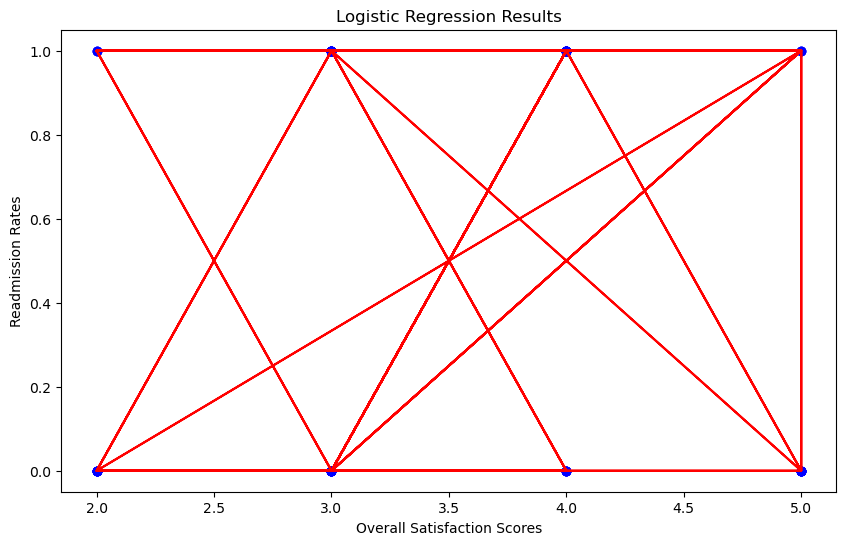


Hospital 2 Data Analysis:
------------------------------
Number of Patients Readmitted: 29
Average StaffSatisfaction: 3.53
Average CleanlinessSatisfaction: 3.63
Average FoodSatisfaction: 3.56
Average ComfortSatisfaction: 3.75
Average CommunicationSatisfaction: 3.72

Logistic Regression Results:
{'-'*30}
Correlation between Overall Satisfaction Scores and Readmission: 0.79


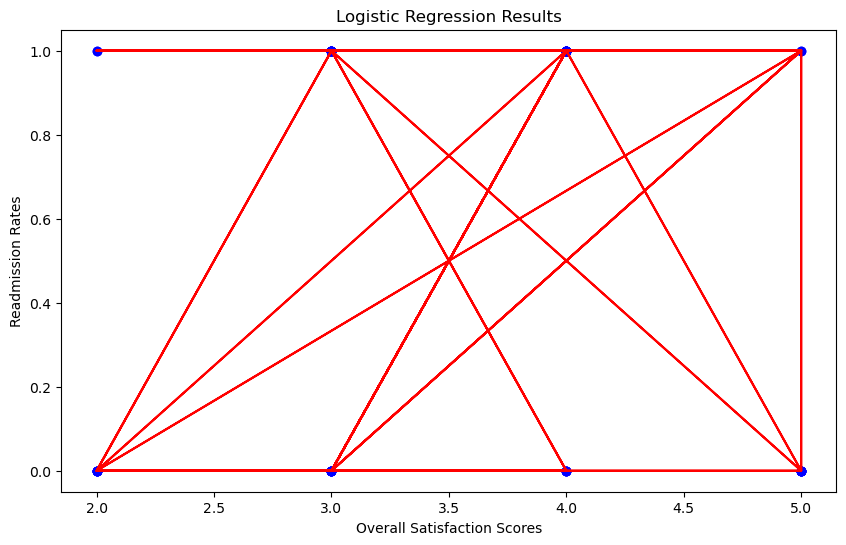


Hospital 1 Data Analysis:
------------------------------
Number of Patients Readmitted: 38
Average StaffSatisfaction: 3.51
Average CleanlinessSatisfaction: 3.61
Average FoodSatisfaction: 3.51
Average ComfortSatisfaction: 3.72
Average CommunicationSatisfaction: 3.70

Logistic Regression Results:
{'-'*30}
Correlation between Overall Satisfaction Scores and Readmission: 0.84


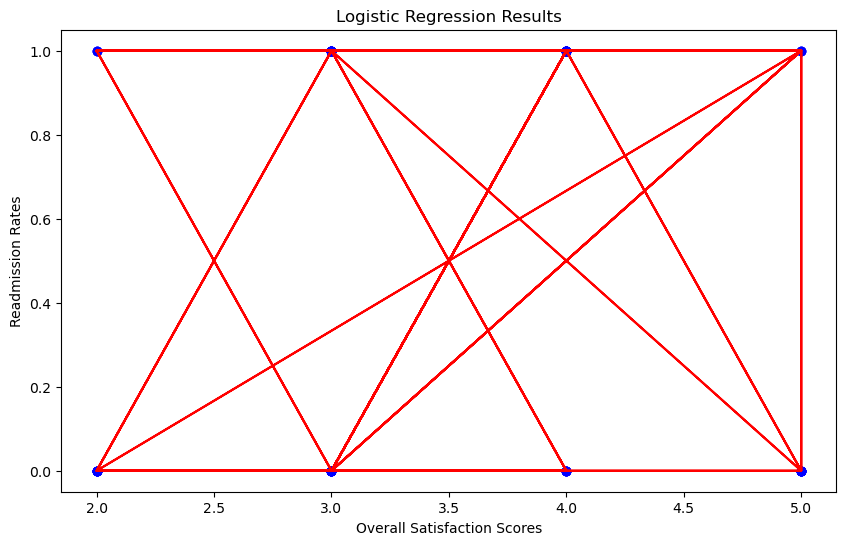


Hospital 2 Data Analysis:
------------------------------
Number of Patients Readmitted: 29
Average StaffSatisfaction: 3.53
Average CleanlinessSatisfaction: 3.63
Average FoodSatisfaction: 3.56
Average ComfortSatisfaction: 3.75
Average CommunicationSatisfaction: 3.72

Logistic Regression Results:
{'-'*30}
Correlation between Overall Satisfaction Scores and Readmission: 0.79


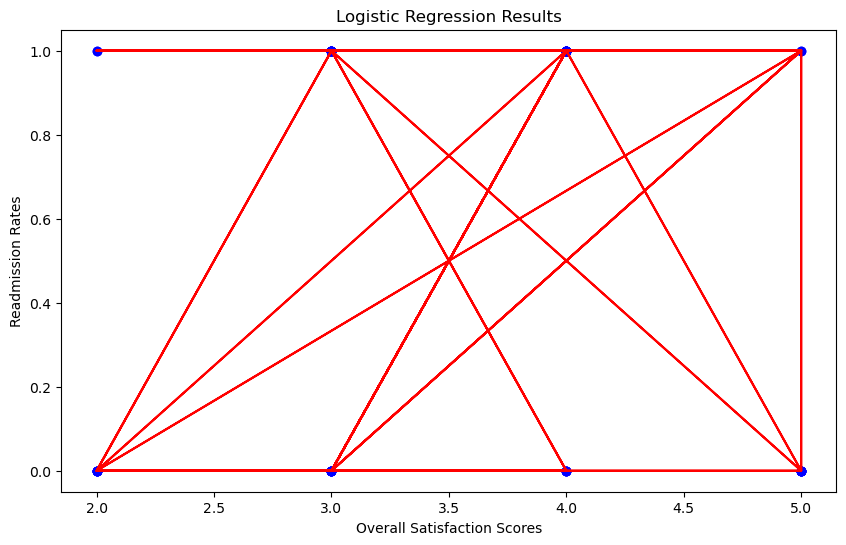


Hospital 1 has a stronger correlation between satisfaction scores and readmission rates.


In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Function to calculate statistics and perform logistic regression
def analyze_data(data, hospital_name):
    print(f"\n{hospital_name} Data Analysis:\n{'-'*30}")
    
    # Calculate statistics
    readmitted_patients = data['Readmission'].sum()
    print(f"Number of Patients Readmitted: {readmitted_patients}")
    
    categories = ['StaffSatisfaction', 'CleanlinessSatisfaction', 'FoodSatisfaction', 'ComfortSatisfaction', 'CommunicationSatisfaction']
    for category in categories:
        avg_satisfaction = data[category].mean()
        print(f"Average {category}: {avg_satisfaction:.2f}")
    
    # Perform logistic regression
    X = data[categories]
    y = data['Readmission'].values.reshape(-1,1)
    log_reg = LogisticRegression().fit(X, y.ravel())
    correlation = log_reg.score(X, y)
    
    print("\nLogistic Regression Results:\n{'-'*30}")
    print(f"Correlation between Overall Satisfaction Scores and Readmission: {correlation:.2f}")
    
    # Plot logistic regression results
    plt.figure(figsize=(10, 6))
    plt.scatter(X.iloc[:, 0], y, color='blue')
    plt.plot(X.iloc[:, 0], log_reg.predict(X), color='red')
    plt.title('Logistic Regression Results')
    plt.xlabel('Overall Satisfaction Scores')
    plt.ylabel('Readmission Rates')
    plt.show()

    return readmitted_patients, avg_satisfaction, correlation

# Read data from files
try:
    hospital1_data = pd.read_csv('Hospital1.txt')
    hospital2_data = pd.read_csv('Hospital2.txt')
    # Remove any leading/trailing spaces from column names
    hospital1_data.columns = hospital1_data.columns.str.strip()
    hospital2_data.columns = hospital2_data.columns.str.strip()
except Exception as e:
    print(f"Error reading data files: {e}")

# Analyze data for each hospital
analyze_data(hospital1_data, "Hospital 1")
analyze_data(hospital2_data, "Hospital 2")

# Compare results
hospital1_stats = analyze_data(hospital1_data, "Hospital 1")
hospital2_stats = analyze_data(hospital2_data, "Hospital 2")
if hospital1_stats[2] > hospital2_stats[2]:
    print("\nHospital 1 has a stronger correlation between satisfaction scores and readmission rates.")
elif hospital1_stats[2] < hospital2_stats[2]:
    print("\nHospital 2 has a stronger correlation between satisfaction scores and readmission rates.")
else:
    print("\nBoth hospitals have the same correlation between satisfaction scores and readmission rates.")